In [1]:
# # GPU checks
import tensorflow as tf
# print(tf.__version__)
# # ------------------
# tf.config.get_visible_devices()
# # ------------------
# tf.test.is_built_with_cuda()
# # ------------------
tf.config.list_physical_devices()
# # ------------------
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())
# # ------------------
# import tensorflow as tf
# if tf.test.gpu_device_name():
#     print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
# else:
#     print("Please install GPU version of TF")
# from tensorflow.python.client import device_lib
# device_lib.list_local_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [5]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [1]:
import preprocess
from PSPNet.builder import PSPNet
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam

def combine(array):
    rtn_array = np.zeros_like(array[:, :, :, 0])
    for batch, _ in enumerate(array):
        for row, _ in enumerate(array[0]):
            for column, _ in enumerate(array[0, 0]):
                rtn_array[batch, row, column] = array[batch, row, column, :].argmax()
    return rtn_array

## Data inspection

In [2]:
x_train, y_train = preprocess.labeled_data(
    images_path="images/train/images/",
    labels_path="images/train/labels/",
    resize=(480, 480)
)
y_train_combined = combine(y_train)

In [3]:
x_train.shape, y_train.shape

((320, 480, 480, 3), (320, 480, 480, 23))

In [4]:
x_train_short, y_train_short = x_train[:20], y_train[:20]
y_train_short_combined = combine(y_train_short)
x_train_short.shape, y_train_short.shape

((20, 480, 480, 3), (20, 480, 480, 23))

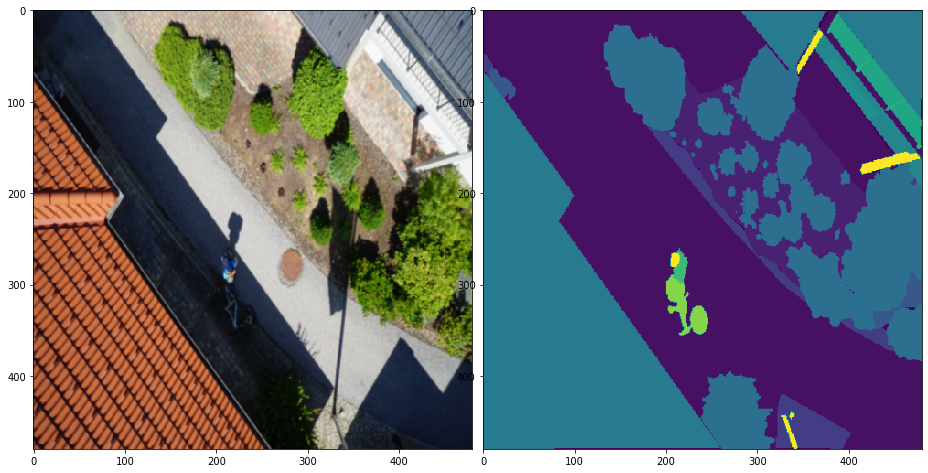

In [5]:
img = 2
plt.figure(figsize=(13, 7))
plt.subplot(121)
io.imshow(x_train_short[img])
plt.subplot(122)
plt.imshow(y_train_short_combined[img]);

## Training

In [6]:
psp = PSPNet(
    blocks=6,
    start_filters=12,
    aux_output_depth=1
)

# # change input shape and rebuild (change module eventually to avoid this)
# psp.input_shape=(128, 128, 3)
# psp.build()

psp.net.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
# psp.net.summary()

In [7]:
psp.net.summary()

Model: "ResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 480, 480, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 480, 480, 12) 48          input_1[0][0]                    
__________________________________________________________________________________________________
resblock_1_1x1_conv_start (Conv (None, 480, 480, 12) 156         conv2d[0][0]                     
__________________________________________________________________________________________________
resblock_1_bn1 (BatchNormalizat (None, 480, 480, 12) 48          resblock_1_1x1_conv_start[0][0]  
_____________________________________________________________________________________________

In [9]:
psp.net.fit(x_train_short, y_train_short, batch_size=1, epochs=5)

Epoch 1/5
20/20 [==============================] - 10s 483ms/step - loss: 3.2638 - accuracy: 0.0900
Epoch 2/5
20/20 [==============================] - 10s 485ms/step - loss: 2.9182 - accuracy: 0.2334
Epoch 3/5
20/20 [==============================] - 10s 486ms/step - loss: 2.7301 - accuracy: 0.3163
Epoch 4/5
20/20 [==============================] - 10s 499ms/step - loss: 2.6005 - accuracy: 0.3921
Epoch 5/5
20/20 [==============================] - 10s 514ms/step - loss: 2.5138 - accuracy: 0.4378


In [ ]:
y_pred = psp.net.predict(x_train_short)

In [21]:
y_pred_combined = combine(y_pred)

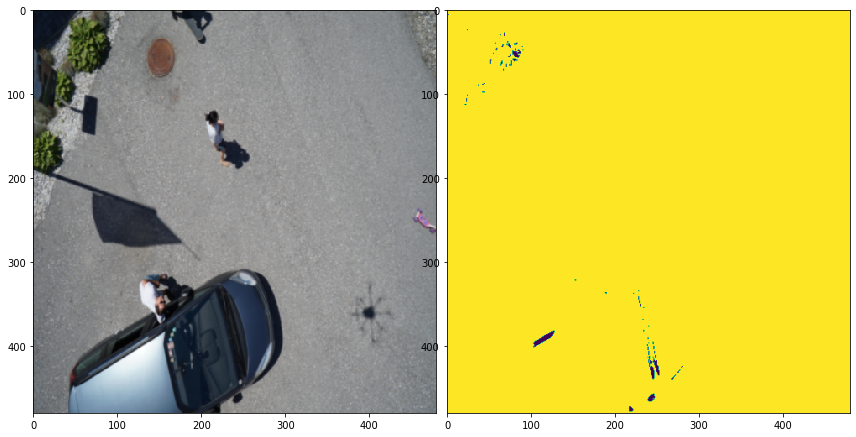

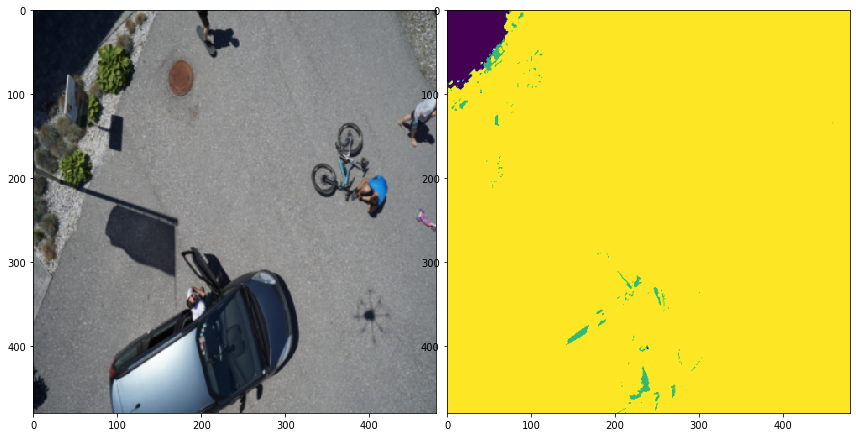

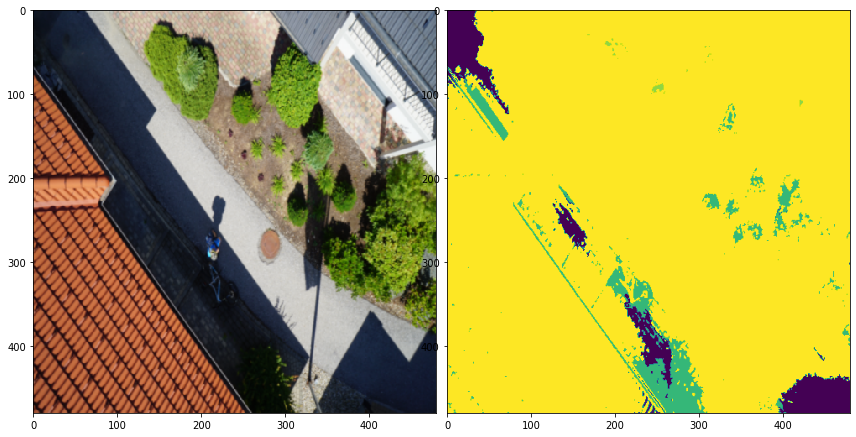

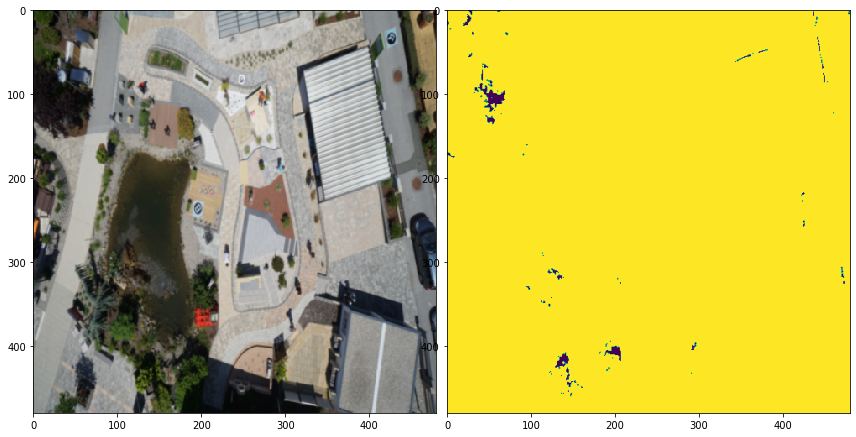

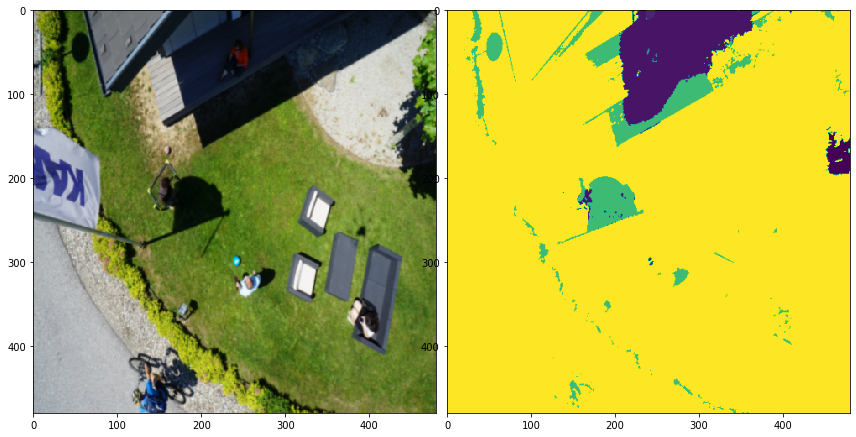

In [25]:
for i, img in enumerate(y_pred_combined):
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    io.imshow(x_train_short[i])
    plt.subplot(122)
    plt.imshow(img)
    plt.show()